# REPERTOIRE

In [1]:
# C:\Users\dieud\Documents\OPENCLASSROOMS\FORMATION_DATA_SCIENTIST\PROJETS_DS_OCR\PROJET6
# PROJET5_DATA_SCIENTIST_OCR
# Changement du repertoire: A ne plus changer.
import os
os.chdir('C://Users//dieud//Documents//OPENCLASSROOMS//FORMATION_DATA_SCIENTIST//PROJETS_DS_OCR//ESSAI')

# IMPORTATION DES LIBRAIRIES USITEES POUR L'ETUDE.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import glob
import scipy.stats as stats

import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from   plotly.subplots import make_subplots
from matplotlib.collections import LineCollection

#from sklearn.model_selection import train_test_split

#import logging as lg


import string
import random
import time

import missingno as msno
import seaborn as sns
sns.set() 
import sys
#from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn import preprocessing
#from sklearn import decomposition
#from sklearn import cluster
#from sklearn.cluster import KMeans
#OMP_NUM_THREADS=5.
#from sklearn.manifold import TSNE
#from sklearn import metrics

#from nltk.stem import WordNetLemmatizer
#from nltk import word_tokenize
#from nltk.corpus import stopwords
#from nltk import ngrams
#import nltk
#nltk.download('punkt')
#nltk.download('stopwords')

#from wordcloud import WordCloud

#import gensim

#import tensorflow as tf
#import tensorflow_hub as hub
#import tensorflow.keras
#from tensorflow.keras import backend as K
#from tensorflow.keras.preprocessing.text import Tokenizer
#from tensorflow.keras.preprocessing.sequence import pad_sequences
#from tensorflow.keras import metrics as kmetrics
#from tensorflow.keras.layers import Input, Embedding, GlobalAveragePooling1D
#from tensorflow.keras.models import Model

import os
from os import listdir
#import transformers
#from transformers import TFAutoModel, AutoTokenizer
#from transformers import logging

from IPython.display import display

from PIL import Image,ImageOps,ImageFilter

import warnings
warnings.filterwarnings('ignore')
sns.set_theme()

# Versions
print('Version des librairies utilisées :')
print('NumPy                 : ' + np.version.full_version)
print('Pandas                : ' + pd.__version__)
print('Python                : ' + sys.version)
print('Seaborn               : ' + sns.__version__)
#print('Cv2                   : ' + cv2.__version__)

Version des librairies utilisées :
NumPy                 : 1.24.3
Pandas                : 1.5.3
Python                : 3.10.11 | packaged by Anaconda, Inc. | (main, Apr 20 2023, 18:56:50) [MSC v.1916 64 bit (AMD64)]
Seaborn               : 0.12.2


# IMPORTATION DES DONNEES.

In [3]:
dfs_P6 = pd.read_csv('DATA/flipkart_com-ecommerce_sample_1050.csv')
# Visualisation
dfs_P6

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,2015-12-01 10:15:43 +0000,http://www.flipkart.com/oren-empower-extra-lar...,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE88ZGTX65GH4V,1399.0,999.0,958f54f4c46b53c8a0a9b8167d9140bc.jpg,False,Oren Empower Extra Large Self Adhesive Sticker...,No rating available,No rating available,Oren Empower,"{""product_specification""=>[{""key""=>""Number of ..."
1046,fd6cbcc22efb6b761bd564c28928483c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIEC889ZD5GDCVQ,4930.0,1896.0,fd6cbcc22efb6b761bd564c28928483c.jpg,False,Wallmantra Large Vinyl Sticker Sticker (Pack o...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ..."
1047,5912e037d12774bb73a2048f35a00009,2015-12-01 10:15:43 +0000,http://www.flipkart.com/uberlyfe-extra-large-p...,Uberlyfe Extra Large Pigmented Polyvinyl Films...,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE5UVGW2JWVWCT,4500.0,1449.0,5912e037d12774bb73a2048f35a00009.jpg,False,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,No rating available,No rating available,Uberlyfe,"{""product_specification""=>[{""key""=>""Number of ..."
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-medium-viny...,Wallmantra Medium Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >.

# EXPLANATORY DATA ANALYSIS (EDA)

In [4]:
# Informations cpntenues dans le dataset.

dfs_P6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

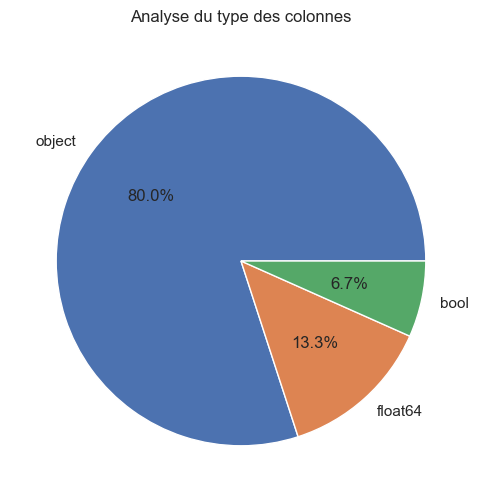

In [5]:
# Représentation de la nature des colonnes (dtypes)

# Définition titre graphique

title = {"family": "arial",
              "color":  "black",
              "weight": "bold",
              "size": 18}

save_results_to = 'C:/Users/dieud/Documents/OPENCLASSROOMS/FORMATION_DATA_SCIENTIST/PROJETS_DS_OCR/ESSAI/GRAPHS/'

plt.figure(figsize = (6,6))
dfs_P6.dtypes.value_counts().plot(kind = 'pie',
                               autopct="%1.1f%%", title = "Analyse du type des colonnes")
plt.savefig(save_results_to + '1-Types_data.png', dpi=300)

plt.show()

In [6]:
# Valeurs manquantes par colonne (variable).

dfs_P6.isna().sum()

uniq_id                      0
crawl_timestamp              0
product_url                  0
product_name                 0
product_category_tree        0
pid                          0
retail_price                 1
discounted_price             1
image                        0
is_FK_Advantage_product      0
description                  0
product_rating               0
overall_rating               0
brand                      338
product_specifications       1
dtype: int64

In [7]:
# Pourcentage des valeurs manquantes par variable (colonne).
dfs_P6.isna().mean()*100

uniq_id                     0.000000
crawl_timestamp             0.000000
product_url                 0.000000
product_name                0.000000
product_category_tree       0.000000
pid                         0.000000
retail_price                0.095238
discounted_price            0.095238
image                       0.000000
is_FK_Advantage_product     0.000000
description                 0.000000
product_rating              0.000000
overall_rating              0.000000
brand                      32.190476
product_specifications      0.095238
dtype: float64

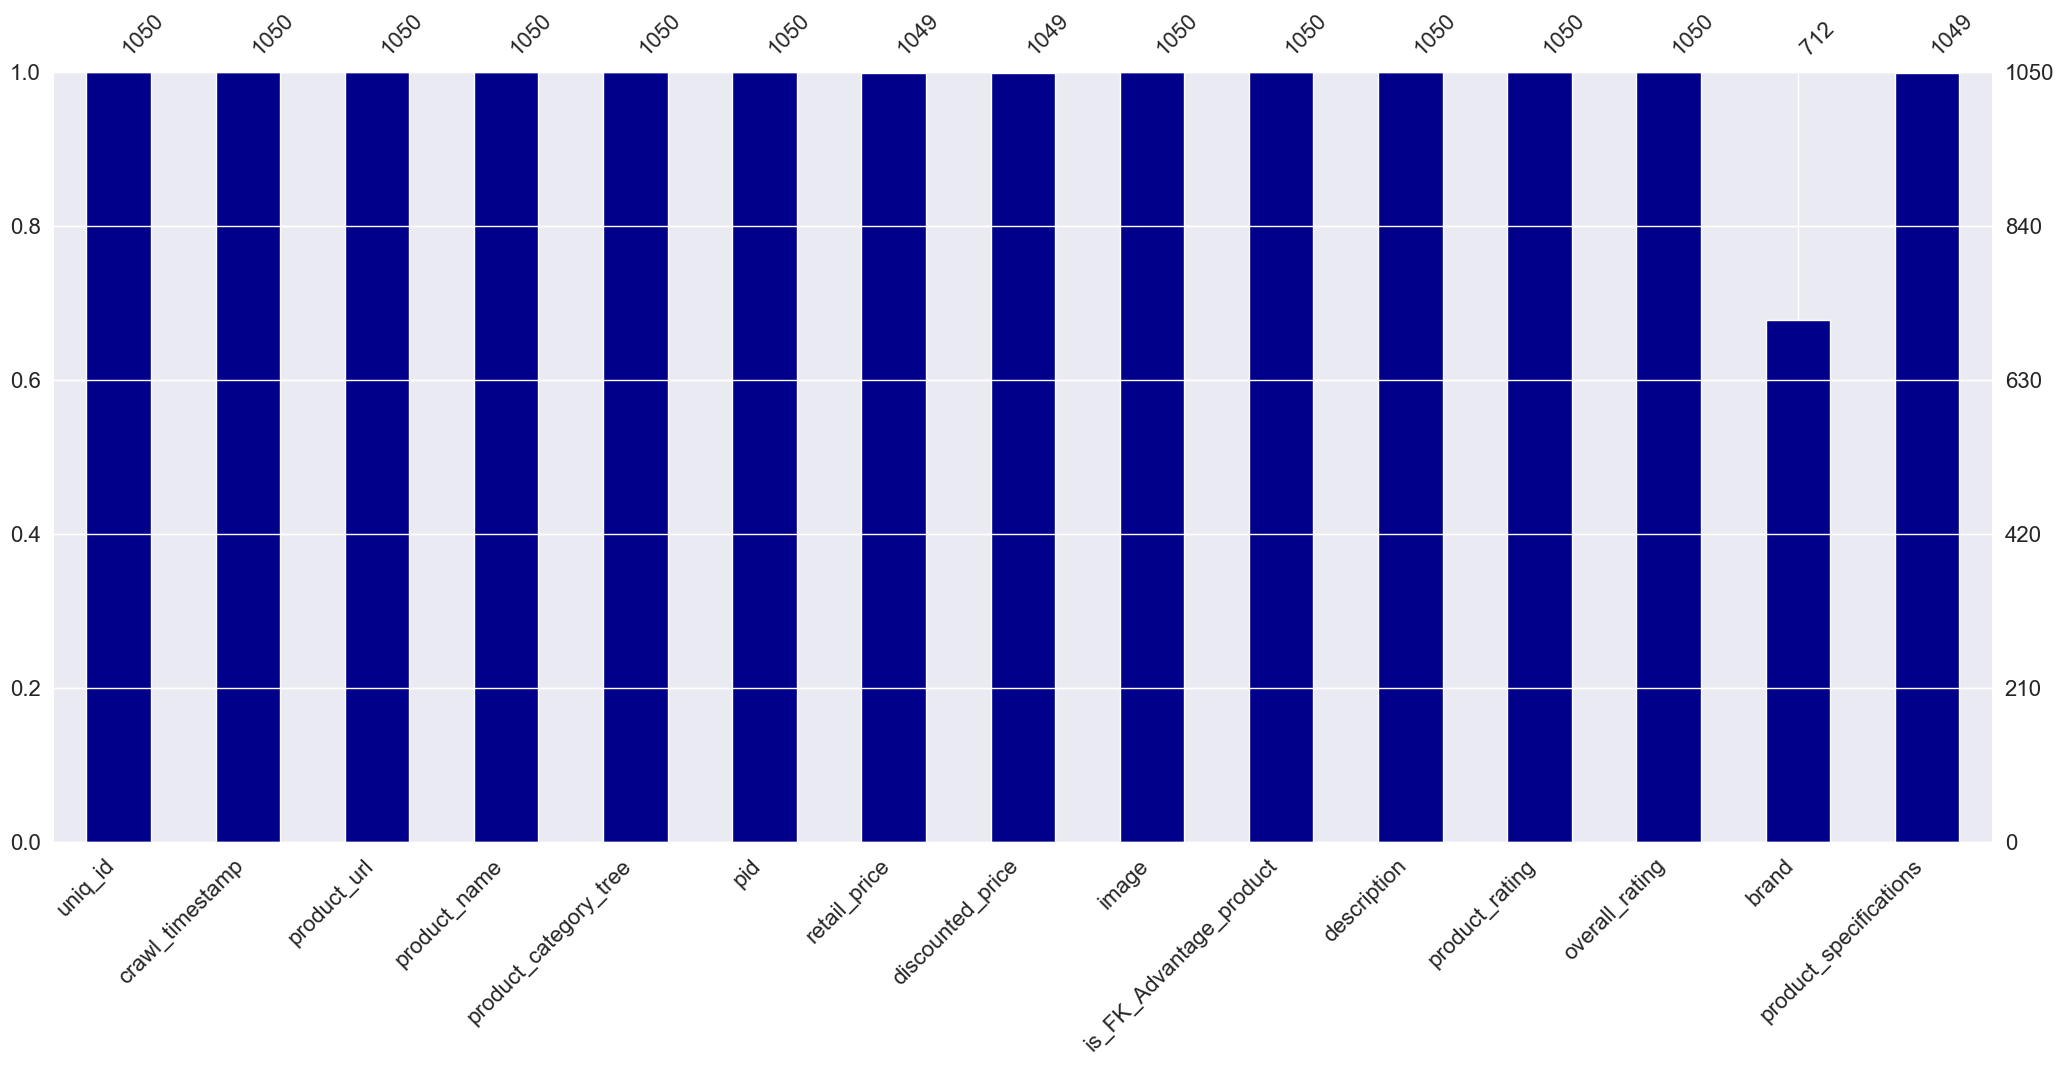

In [8]:
# Identification et visualisation des valeurs manquantes du dataset df_P6.
msno.bar(dfs_P6, color="darkblue")
plt.savefig(save_results_to + '2-ValMan', dpi=300)
plt.show()

In [9]:
dfs = dfs_P6.shape
df_vm = dfs_P6.isnull().sum().sum()/len(dfs_P6)*100
# Editer les résultats
print("le jeu de donnée est composé de",dfs[0] ,"produits et de",dfs[1], "variables caractéristiques")
# Editer le taux de valeurs manquantes
print('Le dataset présente un taux de Valeurs Manquantes de '
     + str(round(df_vm, 5)) + '%.')
# Taux de remplissage.
taux_remp = 100*(1-dfs_P6.isnull().sum().sum()
                 / (dfs_P6.shape[0]*dfs_P6.shape[1]))
print('Le dataset présente un taux de remplissage de '
      + str(round(taux_remp, 5)) + '%.')

le jeu de donnée est composé de 1050 produits et de 15 variables caractéristiques
Le dataset présente un taux de Valeurs Manquantes de 32.47619%.
Le dataset présente un taux de remplissage de 97.83492%.


In [10]:
# Tableau récapitulatif.

data = np.array([(dfs[0],dfs[1],df_vm,taux_remp)])
tableau = pd.DataFrame(data , columns = ['Nombre de lignes','Nombre de colonnes','% de valeurs manquantes','% du taux de remplissage'])
# Visualisation
tableau

,Nombre de lignes,Nombre de colonnes,% de valeurs manquantes,% du taux de remplissage
0,1050.0,15.0,32.47619,97.834921


In [11]:
# Exploration des doublons.
dfs_P6.duplicated().sum()

0

In [12]:
# Identification du nombre élements distincts par variable (colonnes)
dfs_P6.nunique()

uniq_id                    1050
crawl_timestamp             149
product_url                1050
product_name               1050
product_category_tree       642
pid                        1050
retail_price                354
discounted_price            424
image                      1050
is_FK_Advantage_product       2
description                1050
product_rating               27
overall_rating               27
brand                       490
product_specifications      984
dtype: int64

In [13]:
def df_structure(data):
    ''' Cette fonction affiche une synthèse des caractéristiques du dataframe df_P6'''
    
    #Comptage des colonnes numériques et catégorielles
    numeric_columns = len(data.select_dtypes(include = ['float64']).columns)
    categorical_columns= len(data.select_dtypes(include=['object','bool']).columns)

    #Création d'un dictionnaire avec les items de structure de nos données
    dict_structure = {'Nombre de lignes':data.shape[0], 'Nombre de colonnes':data.shape[1], 
                      'Nombre de variables catégorielles':categorical_columns,
                      'Nombre de variables numériques ':numeric_columns,
                      'Pourcentage de données manquantes':int((data.isnull().sum()/len(data)*100).mean()),
                      'Nombre de doublons':int(len(data[data.duplicated()])),
                      'Nombre de valeurs manquantes':data.isna().sum().sum()}

    #Transformation des éléments du dictionnaire en dataframe
    dataframe =pd.DataFrame(list(dict_structure.items()),columns = ['Caractéristiques','Valeurs'])
    return dataframe

In [14]:
# Application de la fonction.
df_structure(dfs_P6)

,Caractéristiques,Valeurs
0,Nombre de lignes,1050
1,Nombre de colonnes,15
2,Nombre de variables catégorielles,13
3,Nombre de variables numériques,2
4,Pourcentage de données manquantes,2
5,Nombre de doublons,0
6,Nombre de valeurs manquantes,341


# Suppression des colonnes (Variables) inutiles pour l'étude.

In [15]:
df_P6 = dfs_P6.drop(columns=[
      'crawl_timestamp',
      'product_url',
      'pid',
      'retail_price',
      'discounted_price',
      'is_FK_Advantage_product',
      'product_rating',
      'overall_rating',
      'product_specifications',
      'brand',
])

df_P6

,uniq_id,product_name,product_category_tree,image,description
0,55b85ea15a1536d46b7190ad6fff8ce7,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",55b85ea15a1536d46b7190ad6fff8ce7.jpg,Key Features of Elegance Polyester Multicolor ...
1,7b72c92c2f6c40268628ec5f14c6d590,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",7b72c92c2f6c40268628ec5f14c6d590.jpg,Specifications of Sathiyas Cotton Bath Towel (...
2,64d5d4a258243731dc7bbb1eef49ad74,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",64d5d4a258243731dc7bbb1eef49ad74.jpg,Key Features of Eurospa Cotton Terry Face Towe...
3,d4684dcdc759dd9cdf41504698d737d8,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",d4684dcdc759dd9cdf41504698d737d8.jpg,Key Features of SANTOSH ROYAL FASHION Cotton P...
4,6325b6870c54cd47be6ebfbffa620ec7,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",6325b6870c54cd47be6ebfbffa620ec7.jpg,Key Features of Jaipur Print Cotton Floral Kin...
...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",958f54f4c46b53c8a0a9b8167d9140bc.jpg,Oren Empower Extra Large Self Adhesive Sticker...
1046,fd6cbcc22efb6b761bd564c28928483c,Wallmantra Large Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",fd6cbcc22efb6b761bd564c28928483c.jpg,Wallmantra Large Vinyl Sticker Sticker (Pack o...
1047,5912e037d12774bb73a2048f35a00009,Uberlyfe Extra Large Pigmented Polyvinyl Films...,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",5912e037d12774bb73a2048f35a00009.jpg,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,Wallmantra Medium Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",c3edc504d1b4f0ba6224fa53a43a7ad6.jpg,Buy Wallmantra Medium Vinyl Sticker Sticker fo...


# Exploration des Catégories des Produits.

#### La catégorie de produit permet de juger de la qualité du clustering effectué. Chaque image est catégorisée par un système d'arbres avec plusieurs profondeurs. Le nom de la colonne renseignant des catégories est 'product_category_tree'.

In [16]:
# Nombre de product_category_tree différents.
print('Nombre de "product_category_tree" différents =', len(df_P6['product_category_tree'].unique().tolist()))

Nombre de "product_category_tree" différents = 642


## Extraction des Catégories de Produits.

In [17]:
# Récupératpon la variable "product_category_tree", et création d'une nouvelle série catégorie en 3 profondeurs.

# Fonction qui extrait les catégories.
def extract_category(column, level):
    if str(column).count(' >> ') >= level-1:
        category = str(column).split(' >> ')[level-1]
    else:
        category = np.nan
    return category

In [18]:
# Extraction de la première catégorie de produit: Cat1.

df_P6['Cat1'] = df_P6['product_category_tree'].apply(
    lambda x: eval(x)).apply(pd.Series)[0].apply(extract_category, level=1)
print('Cat1 (nombre de Catégories) : ', df_P6['Cat1'].nunique())

Cat1 (nombre de Catégories) :  7


In [19]:
# Il y a 150 images par catégorie de première profondeur.

df_image_Cat1 = df_P6.groupby('Cat1').agg({'image' : 'count'})
df_image_Cat1

,image
Cat1,
Baby Care,150
Beauty and Personal Care,150
Computers,150
Home Decor & Festive Needs,150
Home Furnishing,150
Kitchen & Dining,150
Watches,150


In [20]:
# Nous obtenons 7 catégories parfaitement équilibrées avec 150 individus dans chaques catégories.

## Distribution de catégorie de produit au 1e niveau.

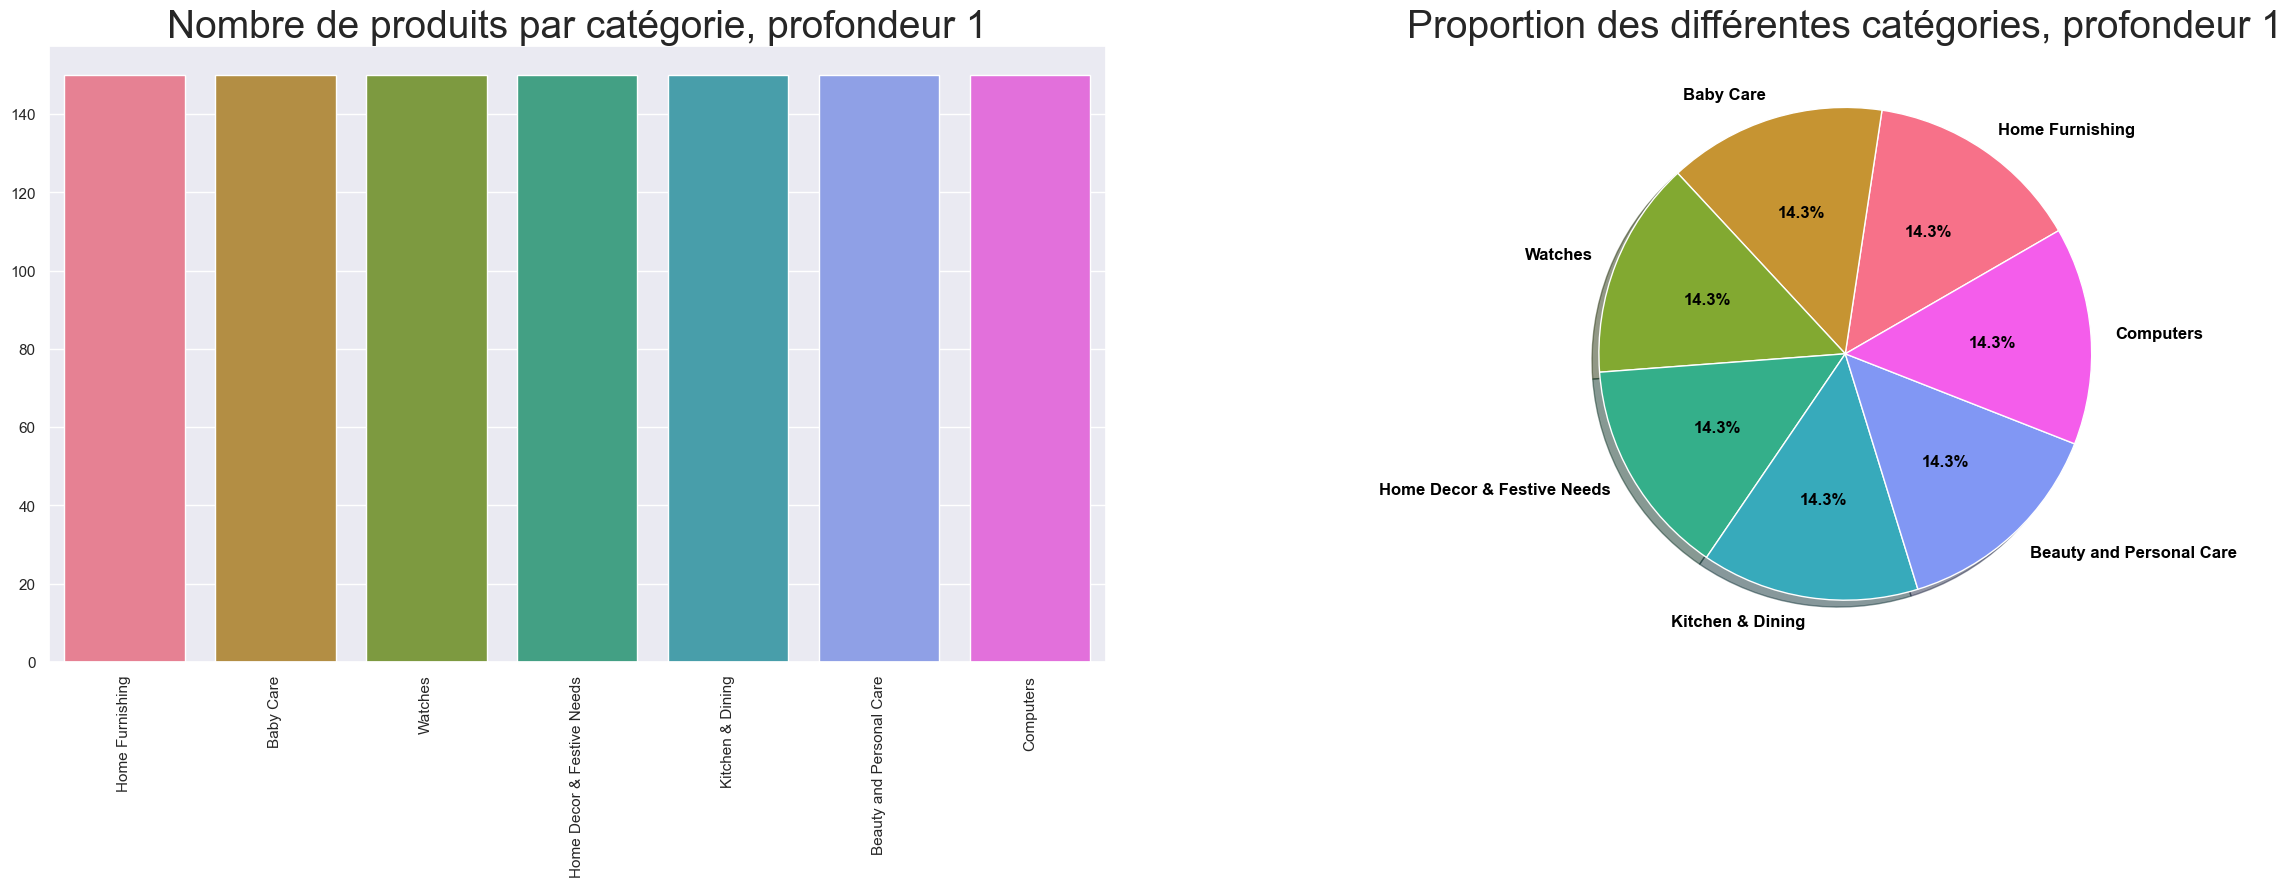

In [21]:
# Histogramme et Pieplot de la répartition des catégories dans la profondeur 2.
fig = plt.figure(1, figsize=(30, 8))
categories_1 = df_P6["Cat1"].value_counts()

plt.title("Proportion des différentes catégories")

sns.set_palette(sns.color_palette("husl", len(categories_1)))

# Barplot 
plt.subplot(1, 2, 1)
plt.title("Nombre de produits par catégorie, profondeur 1", fontsize=28)

sns.barplot(x=categories_1.index, y=categories_1.values, orient="v")
plt.xticks(rotation=90)

# Pieplot
plt.subplot(1, 2, 2)
plt.title("Proportion des différentes catégories, profondeur 1", fontsize=28)
plt.pie(categories_1, labels=categories_1.index, autopct='%1.1f%%', shadow=True, startangle=30,
       textprops=dict(color="black",size=12, weight="bold"))
plt.savefig(save_results_to + '3-Cat1', dpi=300)
plt.show()

In [22]:
# Extraction de la deuxième catégorie de produit: Cat2.

df_P6['Cat2'] = df_P6['product_category_tree'].apply(
    lambda x: eval(x)).apply(pd.Series)[0].apply(extract_category, level=2)
print('Cat2 (nombre de Catégories) : ', df_P6['Cat2'].nunique())

Cat2 (nombre de Catégories) :  62


In [23]:
# La répartition des images dans les catégories de profondeur 2.

df_image_Cat2 = df_P6.groupby('Cat2').agg({'image' : 'count'})
df_image_Cat2.sort_values(by='image', ascending=False)

,image
Cat2,
Wrist Watches,149
Laptop Accessories,87
Infant Wear,84
Coffee Mugs,74
Showpieces,71
...,...
Dinnerware & Crockery,1
Men's Grooming,1
Beauty Accessories,1


In [24]:
# Il y a 62 catégories différentes pour la profondeur 2. La répartition des images dans les catégories est très inégale, avec des catégories qui possèdent 149 images contre 1 pour certaines d’autres.

In [25]:
# Nombre d'images du dataset df_image_Cat2 égale à 1.
len(df_image_Cat2[df_image_Cat2['image']==1])

16

## Distribution de Catégorie de Produit de 2e Niveau.

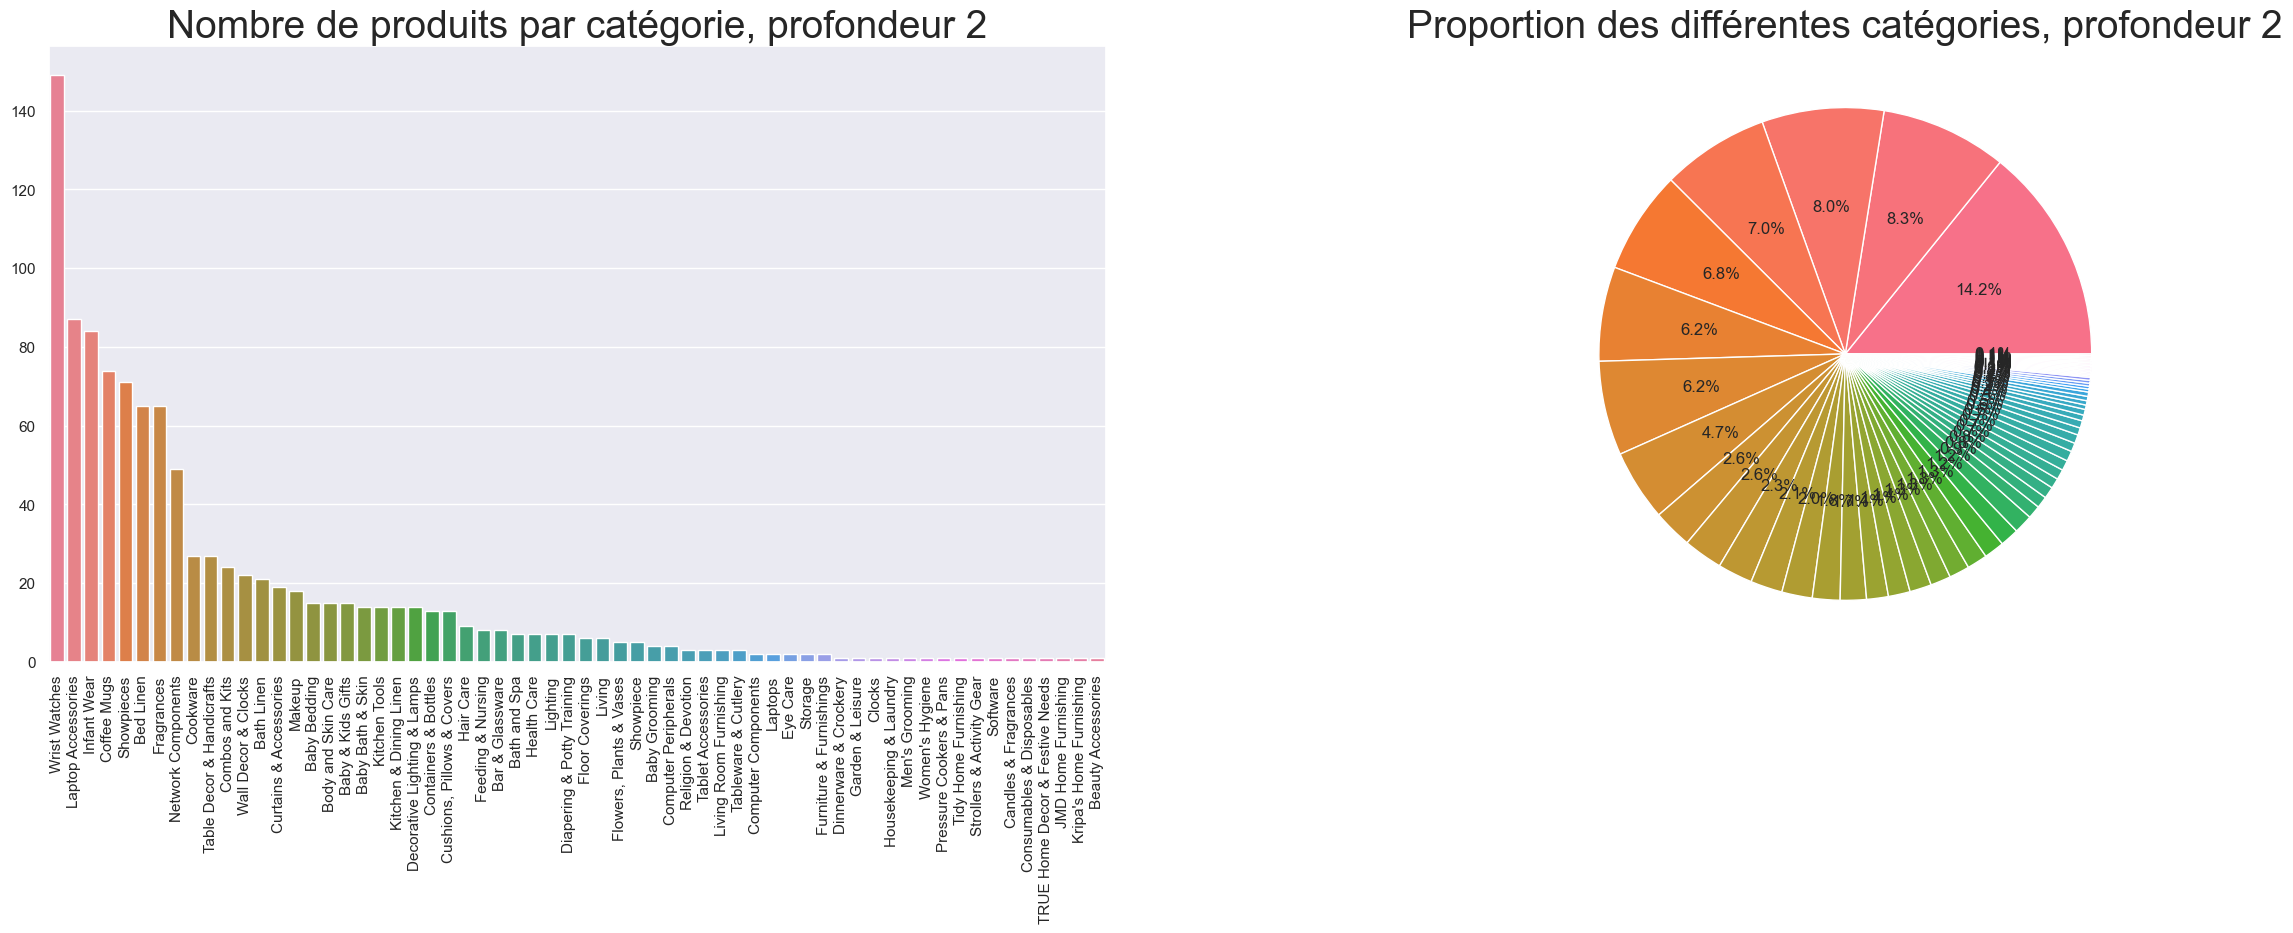

In [26]:
# Histogramme et Pieplot de la répartition des catégories dans la profondeur 2

fig = plt.figure(1, figsize=(30, 8))
categories_2 = df_P6["Cat2"].value_counts()

plt.title("Proportion des différentes catégories")

sns.set_palette(sns.color_palette("husl", len(categories_2)))

# Barplot 
plt.subplot(1, 2, 1)
plt.title("Nombre de produits par catégorie, profondeur 2", fontsize=28)

sns.barplot(x=categories_2.index, y=categories_2.values, orient="v")
plt.xticks(rotation=90)

# Pieplot
plt.subplot(1, 2, 2)
plt.title("Proportion des différentes catégories, profondeur 2", fontsize=28)
plt.pie(categories_2, autopct='%1.1f%%')

plt.savefig(save_results_to + '4-Cat2', dpi=300)
plt.show()

In [27]:
# Extraction de la troisième catégorie de produit: Cat3.

df_P6['Cat3'] = df_P6['product_category_tree'].apply(
    lambda x: eval(x)).apply(pd.Series)[0].apply(extract_category, level=3)
print('Cat3 (nombre de Catégories) : ', df_P6['Cat3'].nunique())

Cat3 (nombre de Catégories) :  241


In [28]:
# La répartition des images dans les catégories de profondeur 3.

df_image_Cat3 = df_P6.groupby('Cat3').agg({'image' : 'count'})
df_image_Cat3.sort_values(by='image', ascending=False)

,image
Cat3,
Deodorants,65
"Blankets, Quilts & Dohars",57
Baby Girls' Clothes,49
Routers,49
USB Gadgets,38
...,...
Jugs & Pitchers,1
Kitchen Tool Sets,1
Kool Kidz Wrist Watches,1


In [29]:
# Nombre d'images du dataset df_image_Cat3 égale à 1.
len(df_image_Cat3[df_image_Cat3['image']==1])

137

In [30]:
# Nous avons 241 catégories différentes pour la profondeur 3. La répartition des images dans les catégories est très inégale, avec des catégories qui possèdent 65 images contre 1 pour certaines d’autres.

## Distribution de Catégorie de Produit au 3e Niveau.

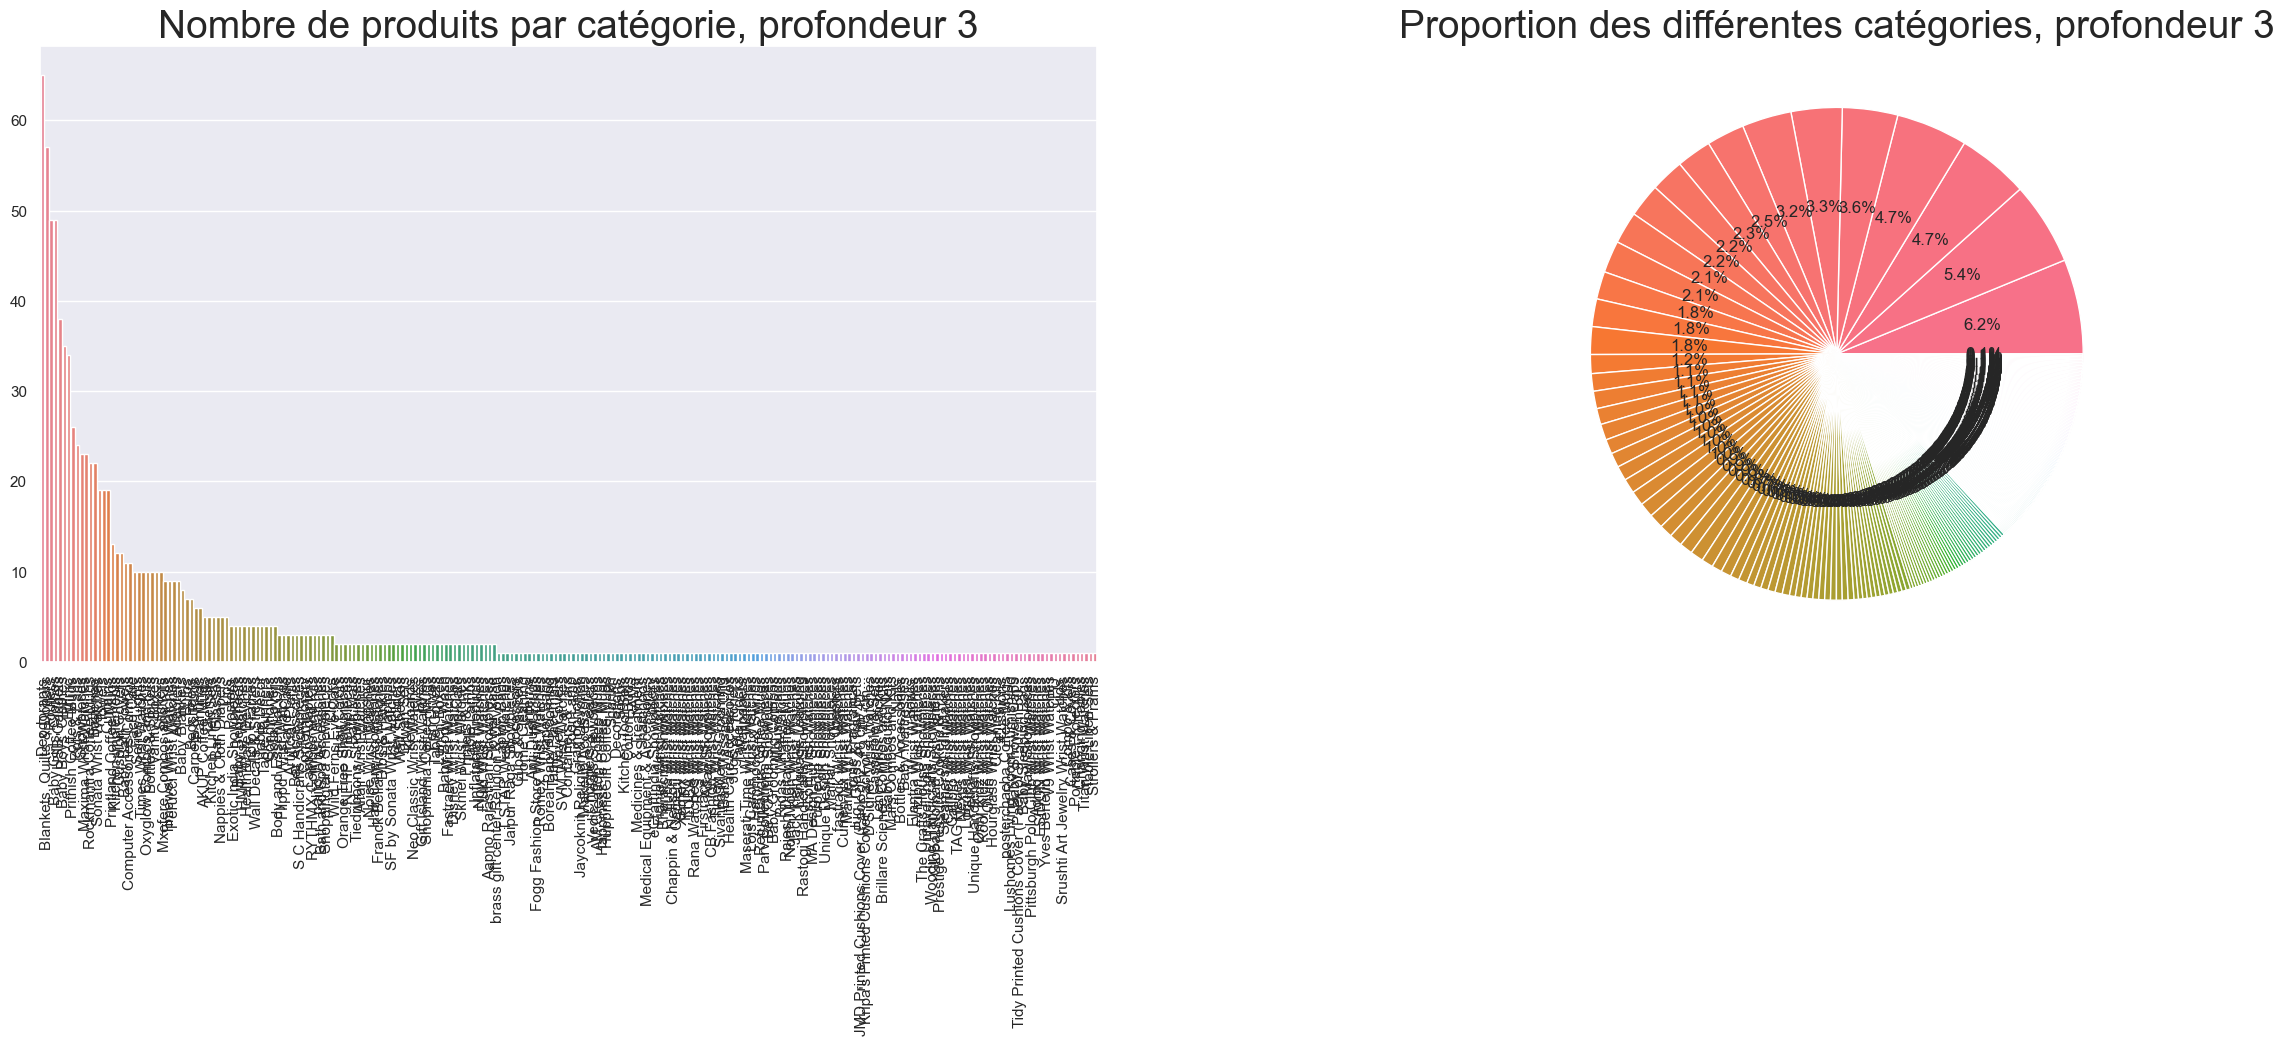

In [31]:
# Histogramme et Pieplot de la répartition des catégories dans la profondeur 3.

fig = plt.figure(1, figsize=(30, 8))
categories_3 = df_P6["Cat3"].value_counts()

plt.title("Proportion des différentes catégories")

sns.set_palette(sns.color_palette("husl", len(categories_3)))

# Barplot 
plt.subplot(1, 2, 1)
plt.title("Nombre de produits par catégorie, profondeur 3", fontsize=28)

sns.barplot(x=categories_3.index, y=categories_3.values, orient="v")
plt.xticks(rotation=90)

# Pieplot
plt.subplot(1, 2, 2)
plt.title("Proportion des différentes catégories, profondeur 3", fontsize=28)
plt.pie(categories_3, autopct='%1.1f%%')

plt.savefig(save_results_to + '5-Cat3', dpi=300)
plt.show()

In [32]:
# En définitive, les catégories Cat2 et Cat3 des profondeurs 2 et 3 sont trop nombreuses et déséquilibrées. 
# De plus, elles contiennent trop de catégories avec un seul produit. Tout ceci les rend inopérante. D'où le choix porté sur les 
# Catégories Cat1 de la profondeur 1 très homogènes et équilibrées pour la suite de l'étude.

# CREER LES CLASSES ET SAUVEGARDER LES IMAGES DANS LES CLASSES PAR CATEGORIES POUR LA DATA AUGMENTATION DE LA CLASSIFICATION SUPERVISEE.

In [33]:
path_data          = 'DATA/'
path_image         = 'Images/' 
path_image_classes ='image_classes/'

In [34]:
df_desc_image = pd.read_csv('C://Users//dieud//Documents//OPENCLASSROOMS//FORMATION_DATA_SCIENTIST//PROJETS_DS_OCR//ESSAI//DATA//df_tokens1', index_col=0)
# Mettre les id_image en index:
df_desc_image.set_index('image',inplace = True)
# Visualisation
df_desc_image

,product_name,description,Catégorie,Catégorie Numérique
image,,,,
55b85ea15a1536d46b7190ad6fff8ce7.jpg,elegance polyester multicolor abstract eyelet ...,key feature elegance polyester multicolor abst...,Home Furnishing,4
7b72c92c2f6c40268628ec5f14c6d590.jpg,sathiyas cotton bath towel,specification sathiyas cotton bath towel 3 bat...,Baby Care,0
64d5d4a258243731dc7bbb1eef49ad74.jpg,eurospa cotton terry face towel set,key feature eurospa cotton terry face towel se...,Baby Care,0
d4684dcdc759dd9cdf41504698d737d8.jpg,santosh royal fashion cotton print king size d...,key feature santosh royal fashion cotton print...,Home Furnishing,4
6325b6870c54cd47be6ebfbffa620ec7.jpg,jaipur print cotton floral king size double be...,key feature jaipur print cotton floral king si...,Home Furnishing,4
...,...,...,...,...
958f54f4c46b53c8a0a9b8167d9140bc.jpg,oren empower extra large self adhesive sticker,oren empower extra large self adhesive sticker...,Baby Care,0
fd6cbcc22efb6b761bd564c28928483c.jpg,wallmantra large vinyl sticker sticker,wallmantra large vinyl sticker sticker pack 1 ...,Baby Care,0
5912e037d12774bb73a2048f35a00009.jpg,uberlyfe extra large pigment polyvinyl film im...,buy uberlyfe extra large pigment polyvinyl fil...,Baby Care,0


In [35]:
# Liste des classes pour etiquetter les images.
classes=df_desc_image['Catégorie'].unique().tolist()
# Visualisation
classes

['Home Furnishing',
 'Baby Care',
 'Watches',
 'Home Decor & Festive Needs',
 'Kitchen & Dining',
 'Beauty and Personal Care',
 'Computers']

In [36]:
path_cat='Images_Classes/'

In [37]:
# Fonction pour créer des nouveaux dossiers:
def new_folder(path,name):
  try:
    os.mkdir(path+name)
    print('Le dossier:{}'.format(name)+' est créé')
  except FileExistsError as e:
    lg.warning('Message: {}'.format(os.strerror(e.errno)))
  except:
    print(os.strerror(e.errno))

In [38]:
# Créer un dossier par catégorie pour stocker les images de chaque categorie:
for classe in classes:
  new_folder('Images_Classes/',classe)

Le dossier:Home Furnishing est créé
Le dossier:Baby Care est créé
Le dossier:Watches est créé
Le dossier:Home Decor & Festive Needs est créé
Le dossier:Kitchen & Dining est créé
Le dossier:Beauty and Personal Care est créé
Le dossier:Computers est créé


In [39]:
# Sauvegarder chaque image dans le dossier qui correspond à sa catégorie:
for im in df_desc_image.index.tolist():
  for classe in classes:
    if df_desc_image['Catégorie'][im]==classe:
      path_classe=path_cat+classe+'/'
      image=Image.open(path_image+im)
      image.save(path_classe+ im.split("/")[-1])

In [40]:
# Ainsi, les noms des différentes classes et leurs catégories sont réalisées pour la suites du travail.